# Seaborn Summary

In [85]:
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype

In [5]:
data = sns.load_dataset("diamonds")
df = data.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
should_be = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [8]:
df.cut = df.cut.astype(CategoricalDtype(categories=should_be,ordered=True))
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

## Bar Plot

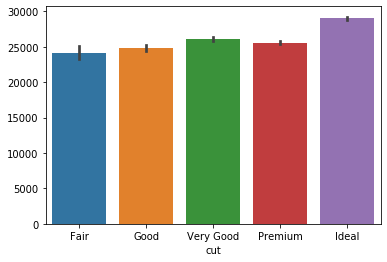

In [9]:
sns.barplot(x=df.cut, y=df.cut.index, data=df)

## Crossovers (Bar)

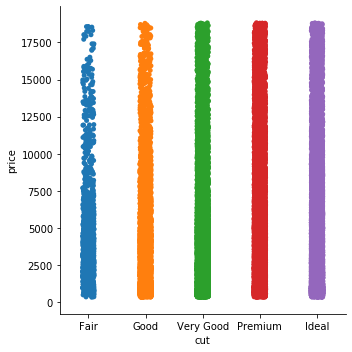

In [10]:
sns.catplot(x="cut", y="price", data=df)

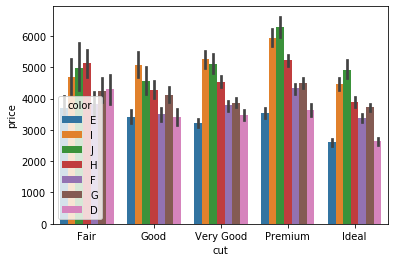

In [11]:
sns.barplot(x="cut", y="price", hue="color", data=df)

#### Bars on each column represent the standard deviation.


### Why are the prices between 0 and 6000 in this chart but normally between 300-18500?

#### -Because large values take representative values relative to the mean in crossover.
#### -- Here is the proof...

In [12]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram & Density

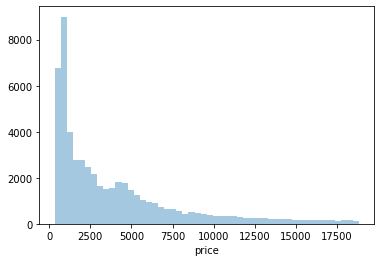

In [13]:
sns.distplot(df.price, kde=False)

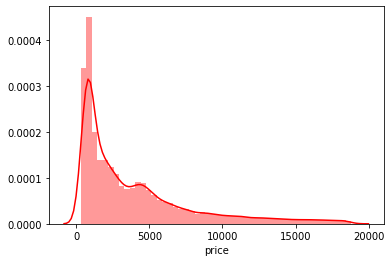

In [14]:
#### "kde" = Density

sns.distplot(df.price, kde=True, color="red")

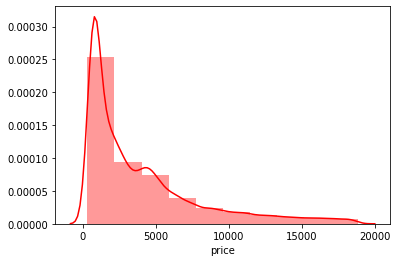

In [15]:
#### Divides the x-axis by the value of "bins"

sns.distplot(df.price, bins=10, kde=True, color="red")

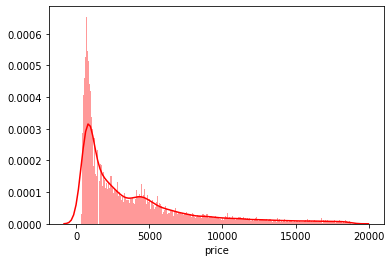

In [16]:
sns.distplot(df.price, bins=1000, kde=True, color="red")

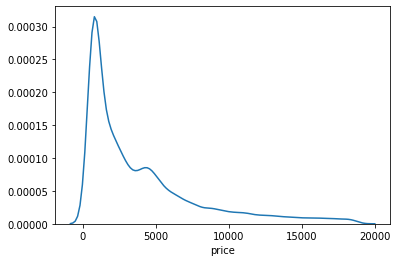

In [17]:
#### "hist" = Histogram

sns.distplot(df.price, hist=False)

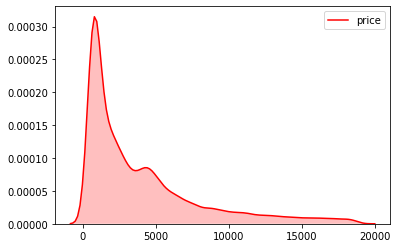

In [18]:
sns.kdeplot(df.price, shade=True, color="red")

## Crossovers (Histogram & Density)

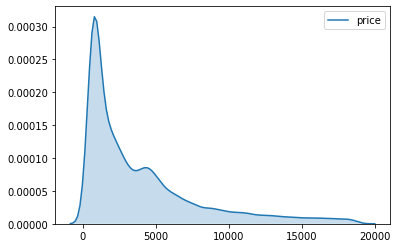

In [20]:
sns.kdeplot(df.price, shade=True)

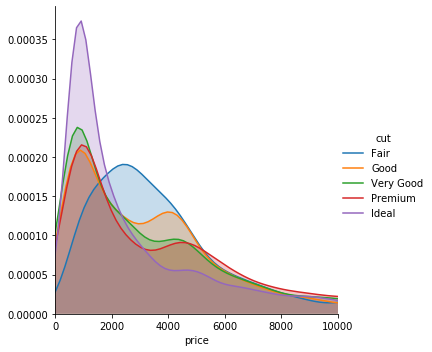

In [22]:
(sns
 .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0, 10000)) 
 .map(sns.kdeplot, "price", shade=True)
 .add_legend()
)

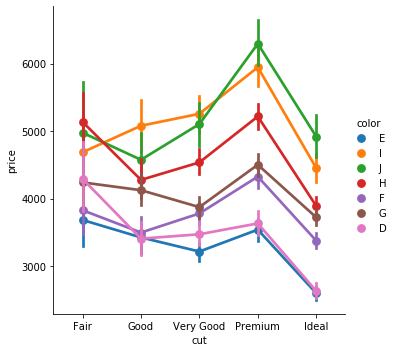

In [25]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df)

## Box Plot

In [26]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

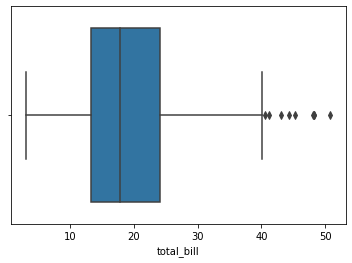

In [28]:
sns.boxplot(df.total_bill)

In [31]:
#### The left side refers to the minimum value, the right side refers to the maximum value.
#### Discrete values like the one on the right are expressed in points.
#### The middle box represents 25%, 50%, 75% values.

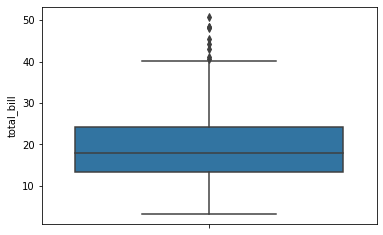

In [30]:
sns.boxplot(df.total_bill, orient="v")

## Crossovers (Box Plot)

### -Which days do we earn more?

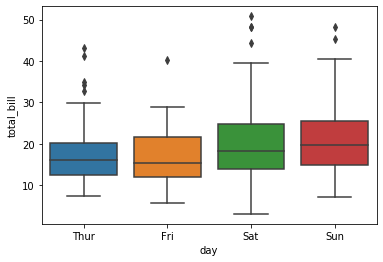

In [32]:
sns.boxplot(x="day", y="total_bill", data=df)

### -Which hours of the day do we earn more?

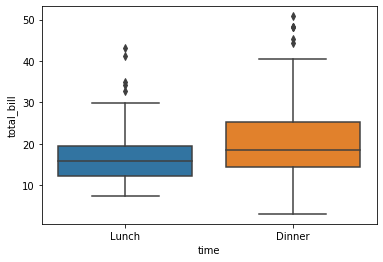

In [36]:
sns.boxplot(x=df.time, y="total_bill", data=df)

### -Is the earning directly proportional to the number of people in the groups?

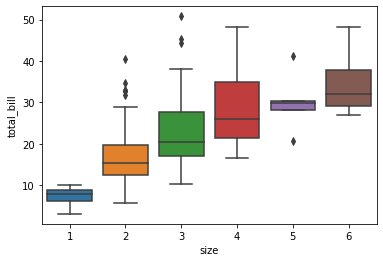

In [37]:
sns.boxplot(x="size", y=df.total_bill, data=df)

### -Day, paid account and gender observation

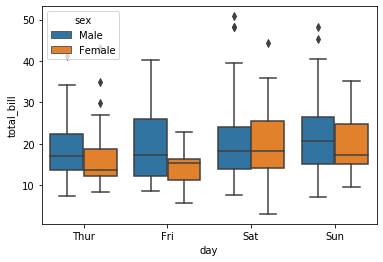

In [39]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=df)

## Violin Plot

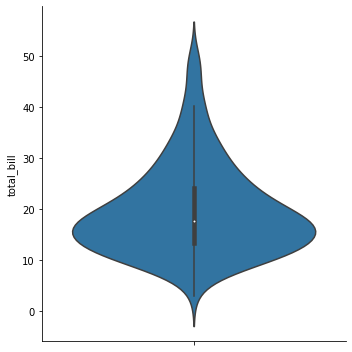

In [40]:
sns.catplot(y="total_bill", kind="violin", data=df)

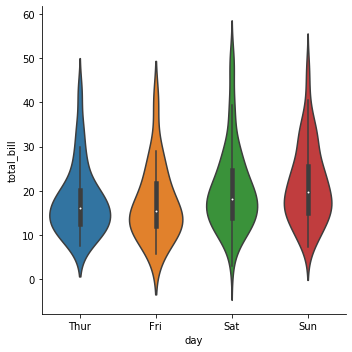

In [44]:
sns.catplot(x="day", y="total_bill", kind="violin", data=df)

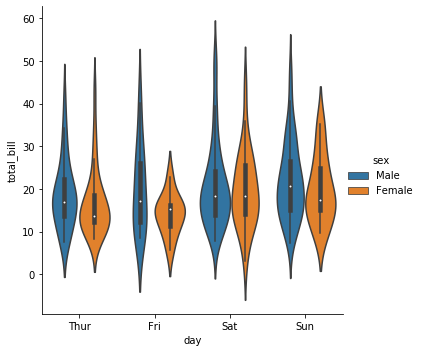

In [45]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=df)

## Correlation Graphs

### -Scatter Plot

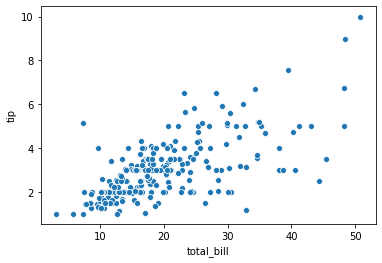

In [46]:
sns.scatterplot(x="total_bill", y="tip", data=df)

### -Crossovers (Scatter Plot)

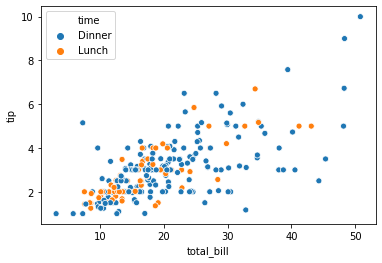

In [48]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df)

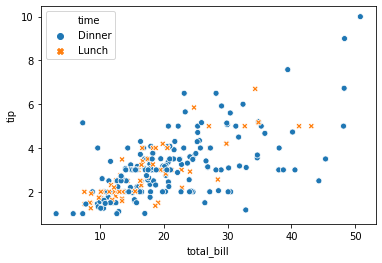

In [49]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df, style="time")

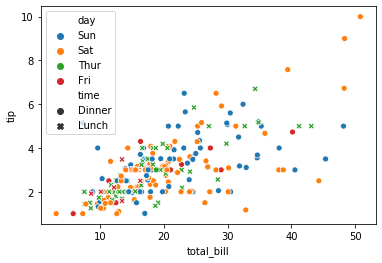

In [50]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df, style="time")

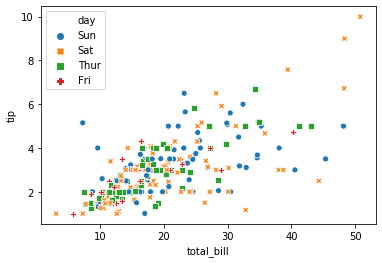

In [51]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df, style="day")

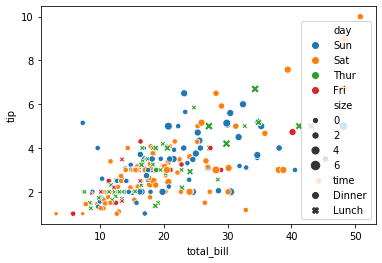

In [54]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df, style="time", size="size")

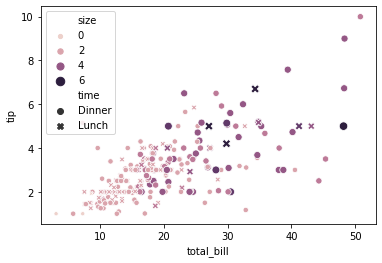

In [55]:
sns.scatterplot(x="total_bill", y="tip", hue="size", data=df, style="time", size="size")

### -Showing the Linear Relationship

In [56]:
import matplotlib.pyplot as plt

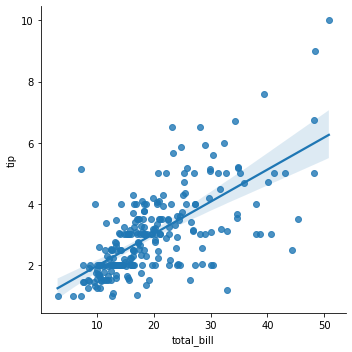

In [57]:
sns.lmplot(x="total_bill", y="tip", data=df)

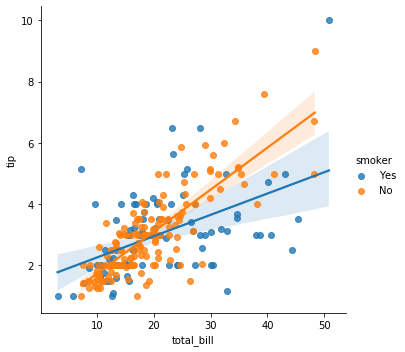

In [58]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)

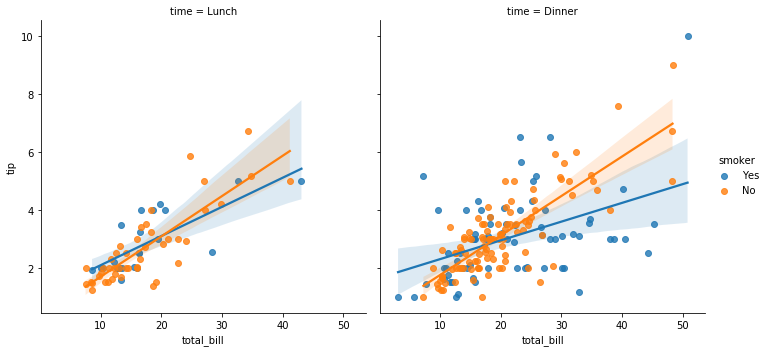

In [59]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df)

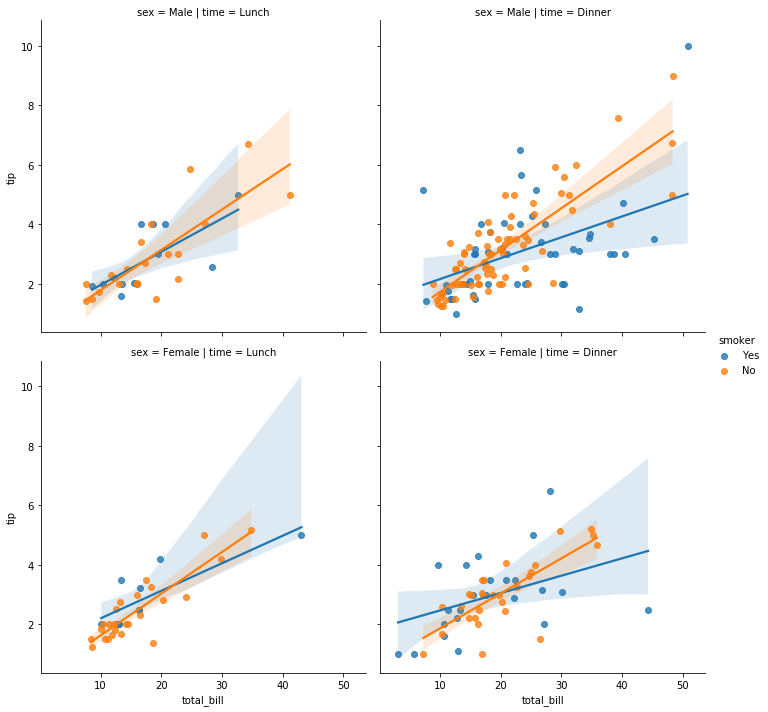

In [60]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=df)

### Scatter Plot  Matrix

In [61]:
iris = sns.load_dataset("iris")
df = iris.copy()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [63]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [64]:
df.shape

(150, 5)

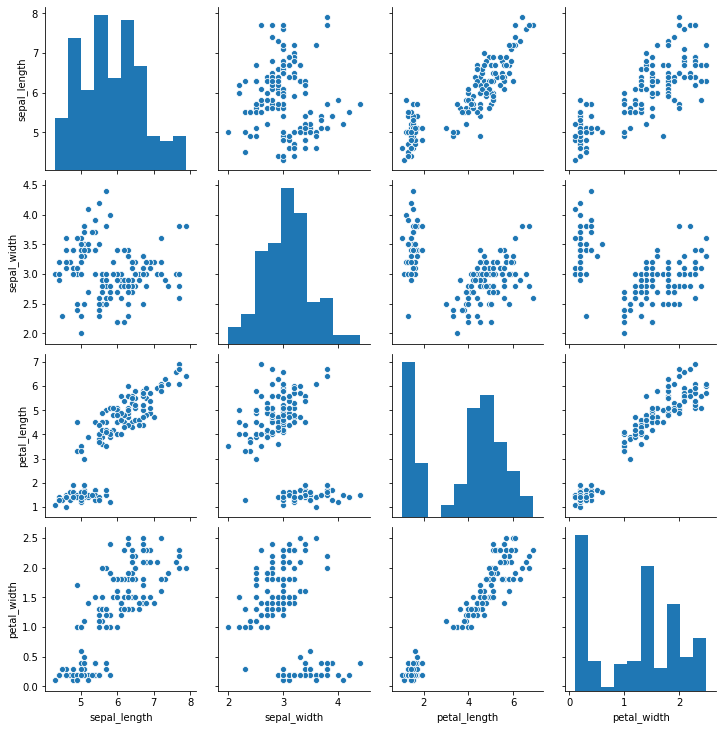

In [66]:
sns.pairplot(df)

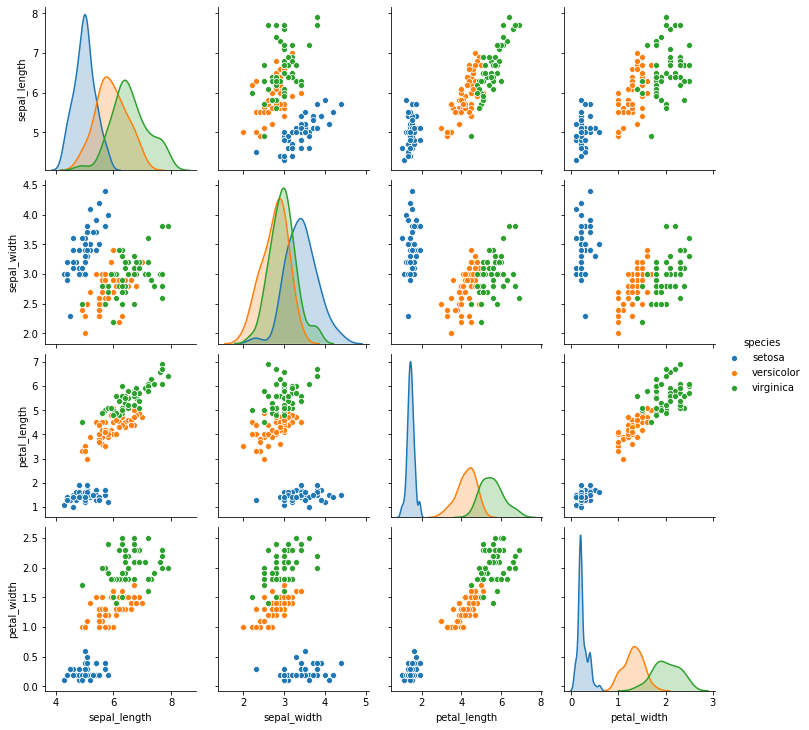

In [67]:
sns.pairplot(df, hue="species")

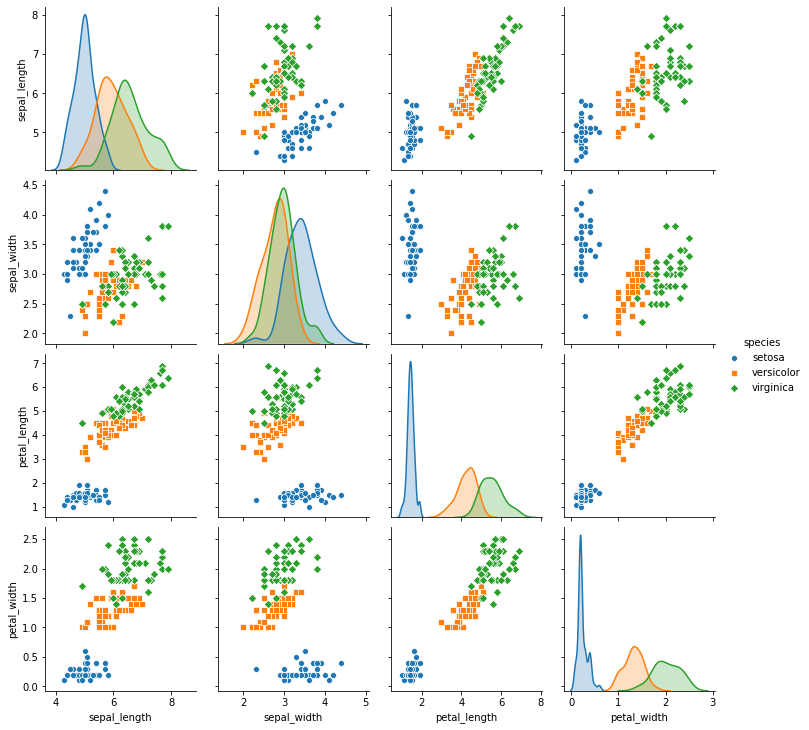

In [68]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

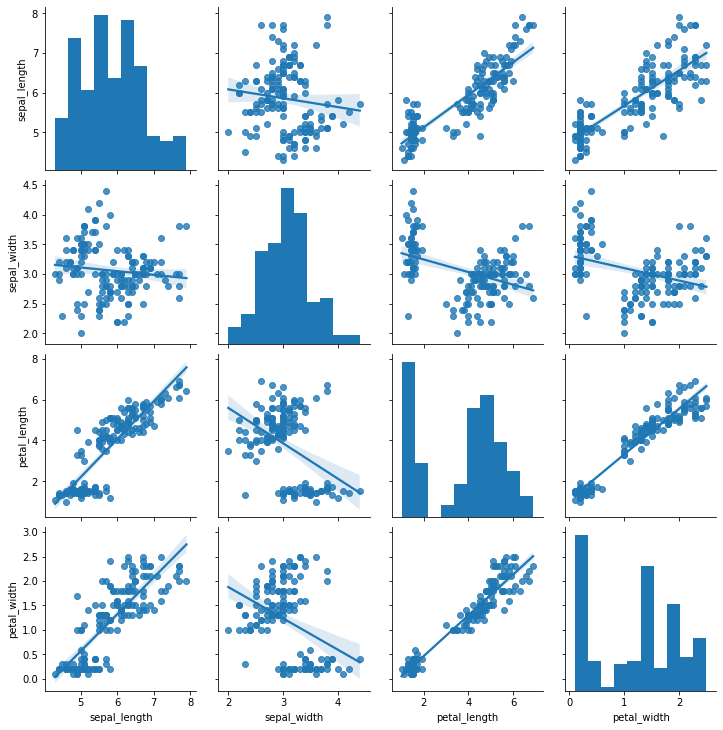

In [69]:
sns.pairplot(df, kind="reg")

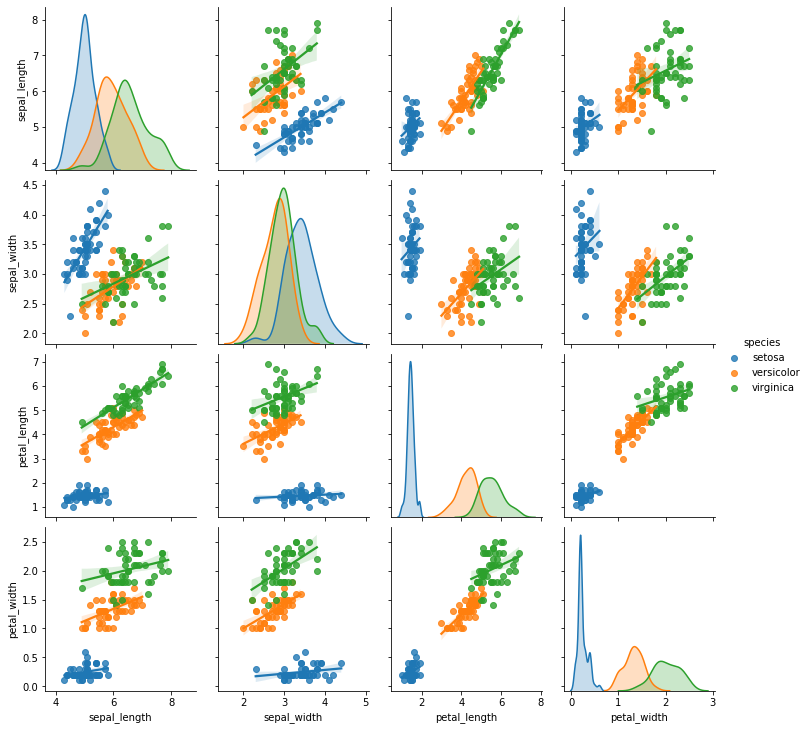

In [70]:
sns.pairplot(df, kind="reg", hue="species")

## Heat Map Graph (Only Pivot Tables)

In [71]:
flights = sns.load_dataset("flights")
df = flights.copy()
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [92]:
df = flights.pivot("month", "year", "passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


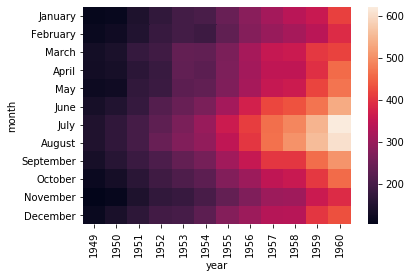

In [93]:
sns.heatmap(df)

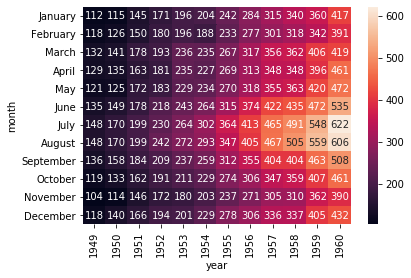

In [95]:
sns.heatmap(df, annot=True, fmt="d")

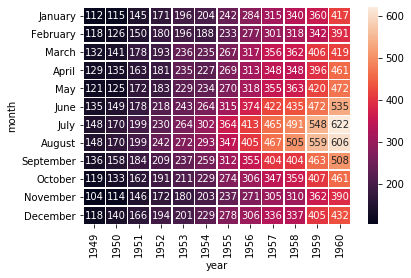

In [96]:
sns.heatmap(df, annot=True, fmt="d", linewidths=.5)

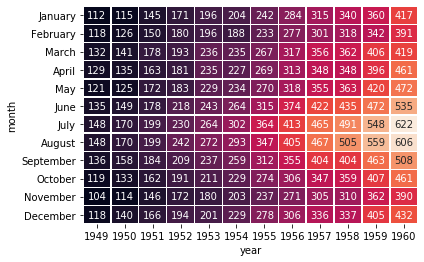

In [97]:
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, cbar=False)

## Line Plot

In [98]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [100]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

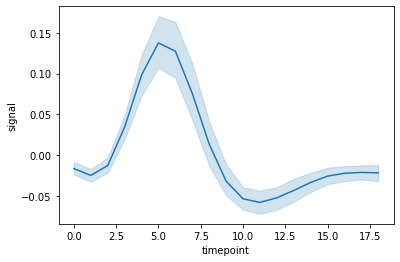

In [101]:
sns.lineplot(x="timepoint", y="signal", data=df)

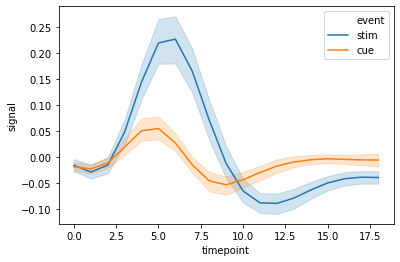

In [102]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=df)

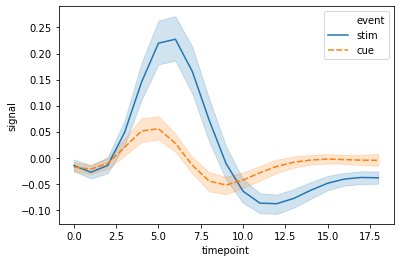

In [103]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=df)

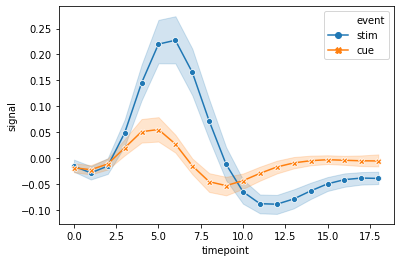

In [104]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers = True,
             dashes=False,
             data=df)

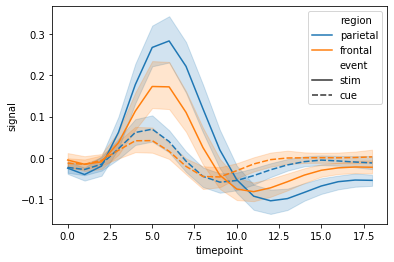

In [105]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=df)